In [1]:
import numpy as np
import pandas as pd 

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white');
plt.rcParams['figure.figsize'] = (15, 7)

# higher resolution plots
%config InlineBackend.figure_format ='retina'

In [2]:
# load in deg guide gene pairs tested in Gasperini experiment
deg_guide_genes = pd.read_csv('../data/GSE120861_all_deg_results.at_scale.txt', sep='\t')
deg_guide_genes.head()

/iblm/netapp/home/karthik/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pairs4merge,beta,intercept,fold_change.transcript_remaining,pvalue.raw,pvalue.empirical,pvalue.empirical.adjusted,ENSG,gene_short_name,gRNA_group,quality_rank_grna,target_site.chr,target_site.start,target_site.stop,target_gene.chr,target_gene.start,target_gene.stop,strand,site_type,outlier_gene
0,ACTB_TSS:ENSG00000008256,-0.114784,-3.432141,0.891559,2.746239e-01,0.261969034,0.831159512731444,ENSG00000008256,CYTH3,ACTB_TSS,control,chr7,5570339,5570340,chr7,6312274,6312275,-,TSS,False
1,ACTB_TSS:ENSG00000011275,-0.042450,-1.464958,0.958438,2.771529e-01,0.264361067,0.831814624048016,ENSG00000011275,RNF216,ACTB_TSS,control,chr7,5570339,5570340,chr7,5821369,5821370,-,TSS,False
2,ACTB_TSS:ENSG00000075618,0.034076,0.392365,1.034664,1.425945e-01,not_applicable,not_applicable,ENSG00000075618,FSCN1,ACTB_TSS,control,chr7,5570339,5570340,chr7,5632454,5632455,+,TSS,False
3,ACTB_TSS:ENSG00000075624,-0.437939,2.898258,0.645365,7.463645e-115,3.941e-06,0.000407265538461538,ENSG00000075624,ACTB,ACTB_TSS,control,chr7,5570339,5570340,chr7,5570339,5570340,-,selfTSS,False
4,ACTB_TSS:ENSG00000086232,-0.010209,1.154783,0.989843,6.253678e-01,0.611785198,0.947813794532952,ENSG00000086232,EIF2AK1,ACTB_TSS,control,chr7,5570339,5570340,chr7,6098860,6098861,-,TSS,False


In [3]:
deg_guide_genes.shape

(629515, 20)

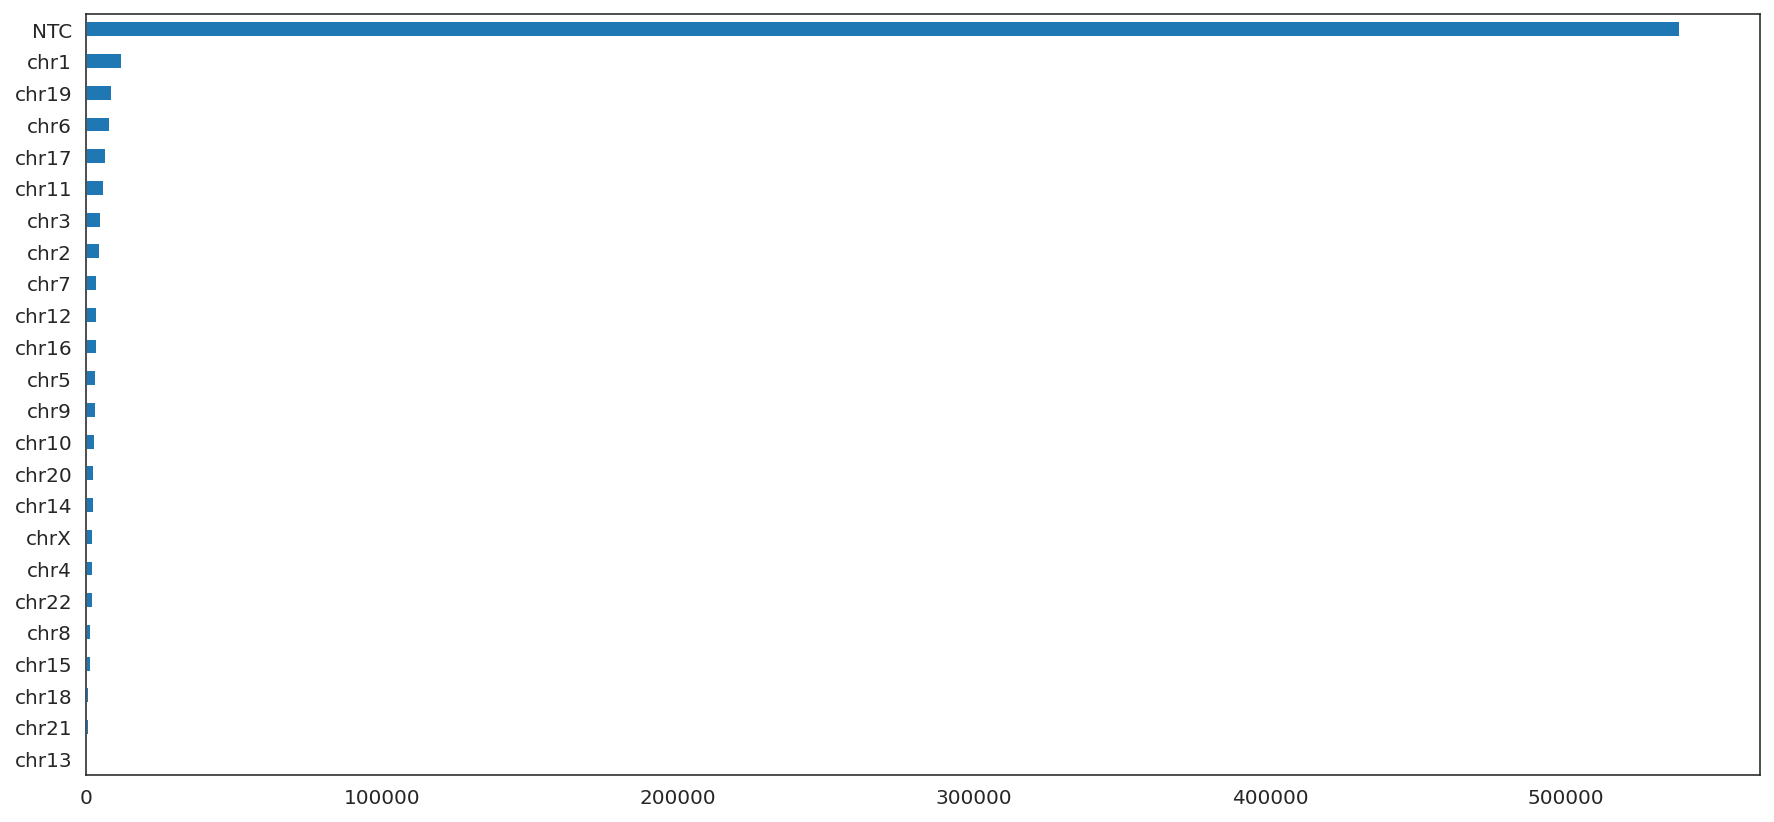

In [5]:
deg_guide_genes['target_site.chr'].value_counts(ascending=True).plot(kind='barh');

<AxesSubplot:ylabel='Frequency'>

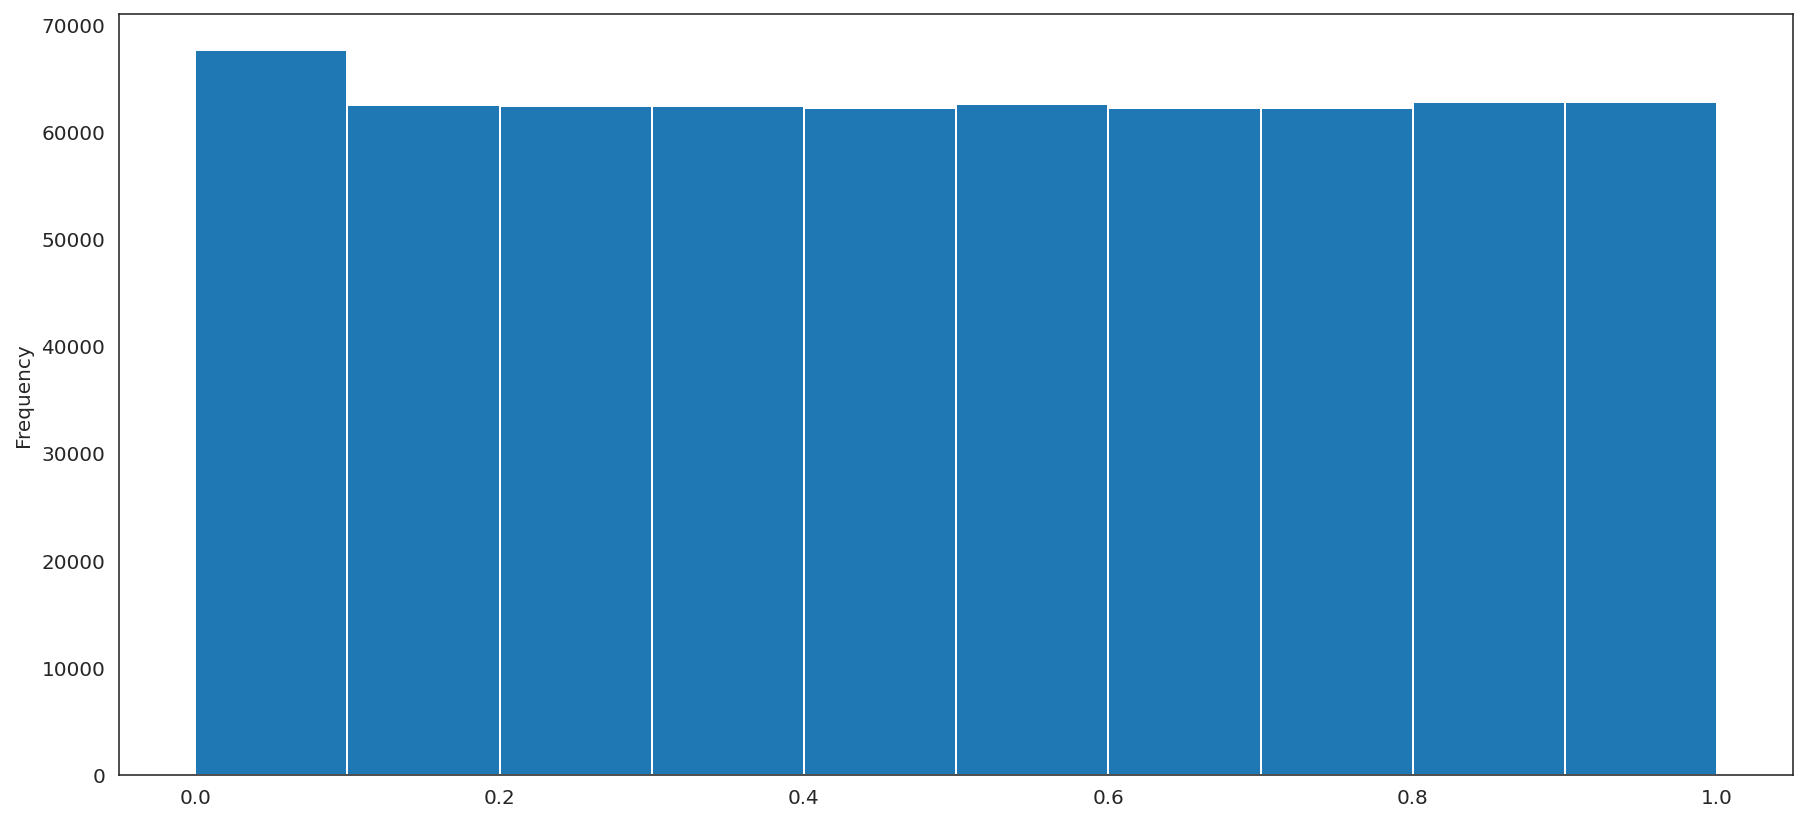

In [6]:
deg_guide_genes['pvalue.raw'].plot(kind='hist')

In [8]:
# filter fot non targeting controls
ntc_guide_genes = deg_guide_genes[deg_guide_genes['target_site.chr'] == 'NTC']
ntc_guide_genes.head()

,pairs4merge,beta,intercept,fold_change.transcript_remaining,pvalue.raw,pvalue.empirical,pvalue.empirical.adjusted,ENSG,gene_short_name,gRNA_group,quality_rank_grna,target_site.chr,target_site.start,target_site.stop,target_gene.chr,target_gene.start,target_gene.stop,strand,site_type,outlier_gene
395,BASSIK_MCH:ENSG00000000419,0.018260,-0.206270,1.018428,0.703719,not_applicable,not_applicable,ENSG00000000419,DPM1,bassik_mch,control,NTC,NTC,NTC,chr20,49575086,49575087,-,NTC,False
396,BASSIK_MCH:ENSG00000000457,0.217632,-3.510819,1.243130,0.193744,not_applicable,not_applicable,ENSG00000000457,SCYL3,bassik_mch,control,NTC,NTC,NTC,chr1,169858028,169858029,-,NTC,False
397,BASSIK_MCH:ENSG00000000460,0.037913,-2.163857,1.038641,0.659834,not_applicable,not_applicable,ENSG00000000460,C1orf112,bassik_mch,control,NTC,NTC,NTC,chr1,169763871,169763872,+,NTC,False
398,BASSIK_MCH:ENSG00000000971,-0.053166,-2.283141,0.948223,0.603404,not_applicable,not_applicable,ENSG00000000971,CFH,bassik_mch,control,NTC,NTC,NTC,chr1,196621008,196621009,+,NTC,False
399,BASSIK_MCH:ENSG00000001036,-0.004415,-0.499949,0.995594,0.934665,not_applicable,not_applicable,ENSG00000001036,FUCA2,bassik_mch,control,NTC,NTC,NTC,chr6,143832826,143832827,-,NTC,False


In [9]:
ntc_guide_genes = ntc_guide_genes.sample(500, random_state=1)
ntc_guide_genes.head()

,pairs4merge,beta,intercept,fold_change.transcript_remaining,pvalue.raw,pvalue.empirical,pvalue.empirical.adjusted,ENSG,gene_short_name,gRNA_group,quality_rank_grna,target_site.chr,target_site.start,target_site.stop,target_gene.chr,target_gene.start,target_gene.stop,strand,site_type,outlier_gene
182272,RANDOM_17:ENSG00000182173,-0.037537,-1.504326,0.963159,0.500602,not_applicable,not_applicable,ENSG00000182173,TSEN54,random_17,control,NTC,NTC,NTC,chr17,73512606,73512607,+,NTC,False
103547,RANDOM_10:ENSG00000129484,0.061514,-1.314414,1.063446,0.379029,not_applicable,not_applicable,ENSG00000129484,PARP2,random_10,control,NTC,NTC,NTC,chr14,20811741,20811742,+,NTC,False
304371,RANDOM_4:ENSG00000131381,0.074453,-2.482636,1.077295,0.473832,not_applicable,not_applicable,ENSG00000131381,ZFYVE20,random_4,control,NTC,NTC,NTC,chr3,15140649,15140650,-,NTC,False
118336,RANDOM_11:ENSG00000174501,-0.049540,-2.818132,0.951667,0.687951,not_applicable,not_applicable,ENSG00000174501,ANKRD36C,random_11,control,NTC,NTC,NTC,chr2,96521124,96521125,-,NTC,False
228353,RANDOM_21:ENSG00000105427,-0.541154,-5.399718,0.582076,0.259324,not_applicable,not_applicable,ENSG00000105427,CNFN,random_21,control,NTC,NTC,NTC,chr19,42894419,42894420,-,NTC,False


In [11]:
ntc_guide_genes.to_csv('../data/ntc_validations.csv', index=False)

In [6]:
# filter out non targeting controls
deg_guide_genes = deg_guide_genes[deg_guide_genes['target_site.chr'] != 'NTC']
deg_guide_genes.head()

,pairs4merge,beta,intercept,fold_change.transcript_remaining,pvalue.raw,pvalue.empirical,pvalue.empirical.adjusted,ENSG,gene_short_name,gRNA_group,quality_rank_grna,target_site.chr,target_site.start,target_site.stop,target_gene.chr,target_gene.start,target_gene.stop,strand,site_type,outlier_gene
0,ACTB_TSS:ENSG00000008256,-0.114784,-3.432141,0.891559,2.746239e-01,0.261969034,0.831159512731444,ENSG00000008256,CYTH3,ACTB_TSS,control,chr7,5570339,5570340,chr7,6312274,6312275,-,TSS,False
1,ACTB_TSS:ENSG00000011275,-0.042450,-1.464958,0.958438,2.771529e-01,0.264361067,0.831814624048016,ENSG00000011275,RNF216,ACTB_TSS,control,chr7,5570339,5570340,chr7,5821369,5821370,-,TSS,False
2,ACTB_TSS:ENSG00000075618,0.034076,0.392365,1.034664,1.425945e-01,not_applicable,not_applicable,ENSG00000075618,FSCN1,ACTB_TSS,control,chr7,5570339,5570340,chr7,5632454,5632455,+,TSS,False
3,ACTB_TSS:ENSG00000075624,-0.437939,2.898258,0.645365,7.463645e-115,3.941e-06,0.000407265538461538,ENSG00000075624,ACTB,ACTB_TSS,control,chr7,5570339,5570340,chr7,5570339,5570340,-,selfTSS,False
4,ACTB_TSS:ENSG00000086232,-0.010209,1.154783,0.989843,6.253678e-01,0.611785198,0.947813794532952,ENSG00000086232,EIF2AK1,ACTB_TSS,control,chr7,5570339,5570340,chr7,6098860,6098861,-,TSS,False


In [7]:
deg_guide_genes.shape

(90955, 20)

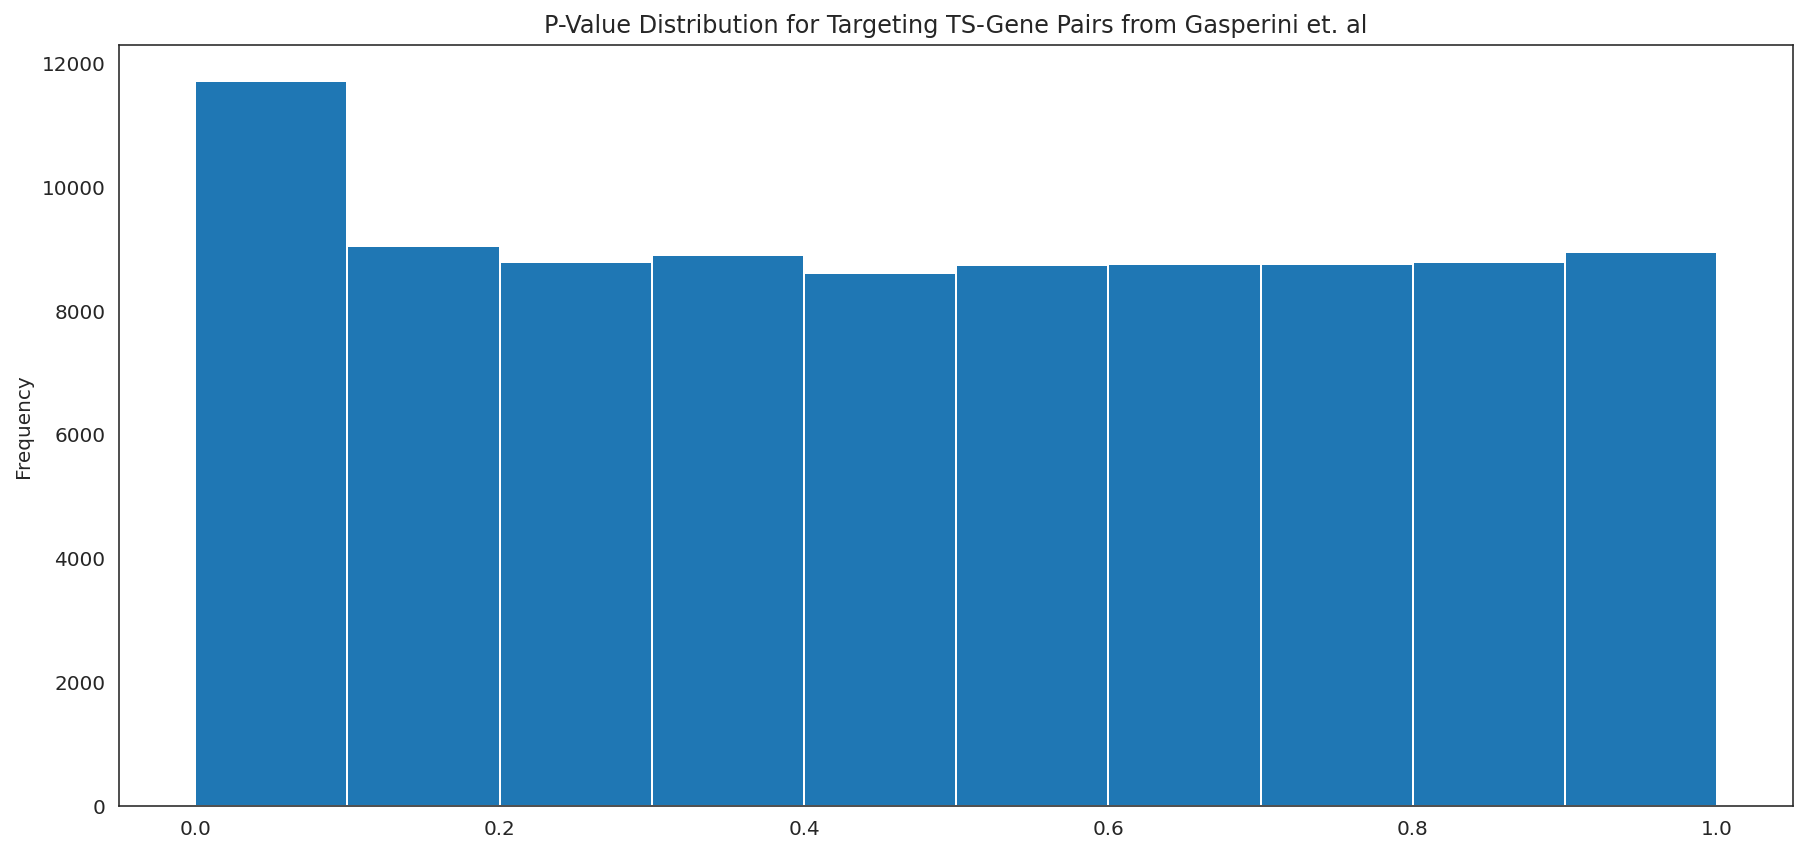

In [8]:
ax = plt.gca()
ax.set_title('P-Value Distribution for Targeting TS-Gene Pairs from Gasperini et. al')
deg_guide_genes['pvalue.raw'].plot(kind='hist');

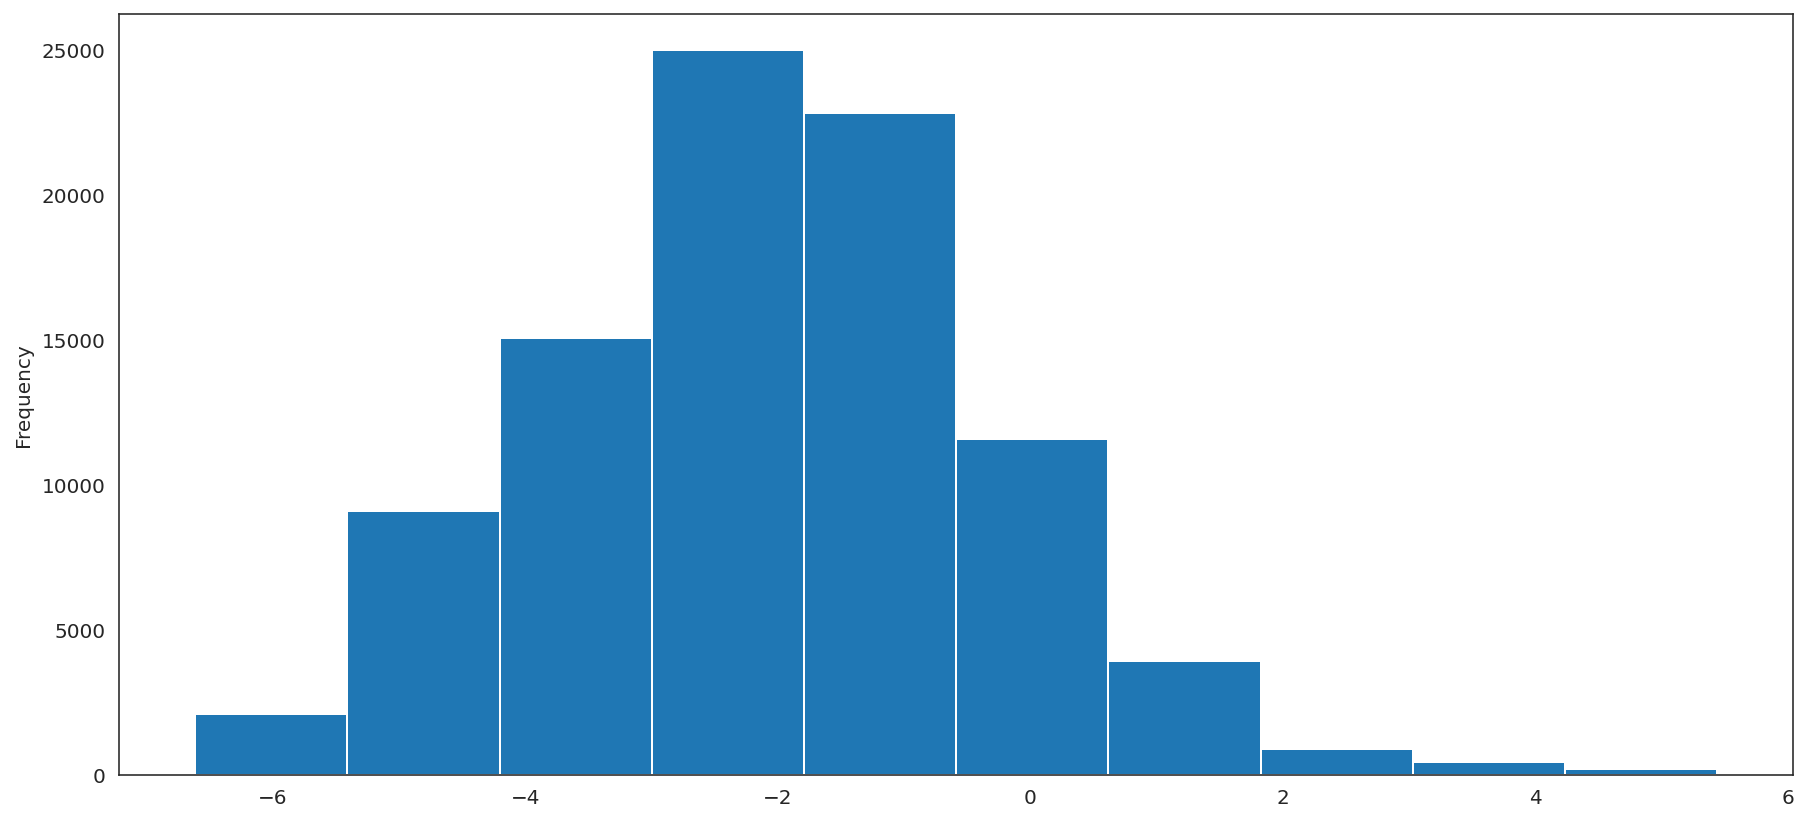

In [9]:
deg_guide_genes['intercept'].plot(kind='hist');

In [10]:
deg_guide_genes.head(20)

,pairs4merge,beta,intercept,fold_change.transcript_remaining,pvalue.raw,pvalue.empirical,pvalue.empirical.adjusted,ENSG,gene_short_name,gRNA_group,quality_rank_grna,target_site.chr,target_site.start,target_site.stop,target_gene.chr,target_gene.start,target_gene.stop,strand,site_type,outlier_gene
0,ACTB_TSS:ENSG00000008256,-0.114784,-3.432141,0.891559,2.746239e-01,0.261969034,0.831159512731444,ENSG00000008256,CYTH3,ACTB_TSS,control,chr7,5570339,5570340,chr7,6312274,6312275,-,TSS,False
1,ACTB_TSS:ENSG00000011275,-0.042450,-1.464958,0.958438,2.771529e-01,0.264361067,0.831814624048016,ENSG00000011275,RNF216,ACTB_TSS,control,chr7,5570339,5570340,chr7,5821369,5821370,-,TSS,False
2,ACTB_TSS:ENSG00000075618,0.034076,0.392365,1.034664,1.425945e-01,not_applicable,not_applicable,ENSG00000075618,FSCN1,ACTB_TSS,control,chr7,5570339,5570340,chr7,5632454,5632455,+,TSS,False
3,ACTB_TSS:ENSG00000075624,-0.437939,2.898258,0.645365,7.463645e-115,3.941e-06,0.000407265538461538,ENSG00000075624,ACTB,ACTB_TSS,control,chr7,5570339,5570340,chr7,5570339,5570340,-,selfTSS,False
4,ACTB_TSS:ENSG00000086232,-0.010209,1.154783,0.989843,6.253678e-01,0.611785198,0.947813794532952,ENSG00000086232,EIF2AK1,ACTB_TSS,control,chr7,5570339,5570340,chr7,6098860,6098861,-,TSS,False
5,ACTB_TSS:ENSG00000106305,-0.101210,-0.646314,0.903743,3.075583e-03,0.004401814,0.138443675103679,ENSG00000106305,AIMP2,ACTB_TSS,control,chr7,5570339,5570340,chr7,6048876,6048877,+,TSS,False
6,ACTB_TSS:ENSG00000106346,-0.039955,-1.914385,0.960833,4.172898e-01,0.402310854,0.889318486139526,ENSG00000106346,USP42,ACTB_TSS,control,chr7,5570339,5570340,chr7,6144515,6144516,+,TSS,False
7,ACTB_TSS:ENSG00000122512,-0.059020,-1.558709,0.942688,1.443179e-01,0.137051297,0.727577281804223,ENSG00000122512,PMS2,ACTB_TSS,control,chr7,5570339,5570340,chr7,6048649,6048650,-,TSS,False
8,ACTB_TSS:ENSG00000122674,-0.046583,-1.227582,0.954485,2.058391e-01,0.195295536,0.785689310534325,ENSG00000122674,CCZ1,ACTB_TSS,control,chr7,5570339,5570340,chr7,5938365,5938366,+,TSS,False
9,ACTB_TSS:ENSG00000136238,-0.013954,1.781187,0.986143,4.680120e-01,0.452693303,0.906222306476247,ENSG00000136238,RAC1,ACTB_TSS,control,chr7,5570339,5570340,chr7,6414154,6414155,+,TSS,False


In [12]:
general_validations = deg_guide_genes.sample(5000, random_state=1)
general_validations.to_csv('../data/general_at_scale_ts_genes.csv', index=False)

In [ ]:
deg_guide_genes.shape

In [4]:
# sample 1000 deg pairs for validation 
validate_df = deg_guide_genes.sample(1000).reset_index(drop=True)
validate_df.head(30)

,pairs4merge,beta,intercept,fold_change.transcript_remaining,pvalue.raw,pvalue.empirical,pvalue.empirical.adjusted,ENSG,gene_short_name,gRNA_group,quality_rank_grna,target_site.chr,target_site.start,target_site.stop,target_gene.chr,target_gene.start,target_gene.stop,strand,site_type,outlier_gene
0,RANDOM_22:ENSG00000268172,0.085467,-4.583090,1.089225,0.665571,not_applicable,not_applicable,ENSG00000268172,AL590452.1,random_22,control,NTC,NTC,NTC,chr1,144989309,144989310,+,NTC,False
1,RANDOM_11:ENSG00000236320,0.160599,-3.088943,1.174214,0.390707,not_applicable,not_applicable,ENSG00000236320,SLFN14,random_11,control,NTC,NTC,NTC,chr17,33885116,33885117,-,NTC,False
2,SCRAMBLED_22:ENSG00000141026,0.099916,-2.407849,1.105079,0.404158,not_applicable,not_applicable,ENSG00000141026,MED9,scrambled_22,control,NTC,NTC,NTC,chr17,17380300,17380301,+,NTC,False
3,RANDOM_10:ENSG00000063180,0.007927,-2.465262,1.007958,0.950965,not_applicable,not_applicable,ENSG00000063180,CA11,random_10,control,NTC,NTC,NTC,chr19,49149568,49149569,-,NTC,False
4,RANDOM_10:ENSG00000066926,-0.030468,0.406945,0.969991,0.446648,not_applicable,not_applicable,ENSG00000066926,FECH,random_10,control,NTC,NTC,NTC,chr18,55253885,55253886,-,NTC,False
5,SCRAMBLED_24:ENSG00000110880,0.028155,-0.772151,1.028555,0.531420,not_applicable,not_applicable,ENSG00000110880,CORO1C,scrambled_24,control,NTC,NTC,NTC,chr12,109096850,109096851,-,NTC,False
6,RANDOM_19:ENSG00000162772,0.103950,-0.671299,1.109545,0.258820,not_applicable,not_applicable,ENSG00000162772,ATF3,random_19,control,NTC,NTC,NTC,chr1,212738676,212738677,+,NTC,True
7,SCRAMBLED_25:ENSG00000131748,-0.052083,-1.198579,0.949250,0.331353,not_applicable,not_applicable,ENSG00000131748,STARD3,scrambled_25,control,NTC,NTC,NTC,chr17,37793318,37793319,+,NTC,False
8,SCRAMBLED_18:ENSG00000157593,0.006239,-1.316351,1.006259,0.909656,not_applicable,not_applicable,ENSG00000157593,SLC35B2,scrambled_18,control,NTC,NTC,NTC,chr6,44225290,44225291,-,NTC,False
9,RANDOM_17:ENSG00000121057,-0.035756,-1.873903,0.964876,0.568664,not_applicable,not_applicable,ENSG00000121057,AKAP1,random_17,control,NTC,NTC,NTC,chr17,55162551,55162552,+,NTC,False


In [12]:
# significant_pairs = deg_guide_genes[deg_guide_genes['pvalue.raw'] < 0.05]

In [5]:
sites = (validate_df['pairs4merge'].str.split(':')).apply(lambda x: x[0])
genes = (validate_df['pairs4merge'].str.split(':')).apply(lambda x: x[1])
pvalues = validate_df['pvalue.raw']
validate_ts_genes = pd.concat([sites, genes, pvalues], axis=1).reset_index(drop=True)
validate_ts_genes.columns = ['target_site', 'gene', 'pvalue']
validate_ts_genes.head()

,target_site,gene,pvalue
0,RANDOM_22,ENSG00000268172,0.665571
1,RANDOM_11,ENSG00000236320,0.390707
2,SCRAMBLED_22,ENSG00000141026,0.404158
3,RANDOM_10,ENSG00000063180,0.950965
4,RANDOM_10,ENSG00000066926,0.446648


In [6]:
validate_ts_genes.to_csv('./../data/validate_ts_genes.csv', index=False)

In [15]:
validate_ts_genes.shape

(1000, 3)

In [16]:
# load in group sequence dataframe
group_sequence_df = pd.read_csv('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_grna_groups.at_scale.txt', sep='\t', 
                                names=['gRNA_group', 'spacer_sequence'])
group_sequence_df.head()

,gRNA_group,spacer_sequence
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG
1,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG
2,FAM83A_TSS,AACACACCACGGAGGAGTGG
3,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG
4,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG


In [20]:
validate_ts_genes['target_site'] = validate_ts_genes['target_site'].str.lower()
group_sequence_df['gRNA_group'] = group_sequence_df['gRNA_group'].str.lower()

In [44]:
merged_df = validate_ts_genes.merge(group_sequence_df, left_on='target_site', right_on='gRNA_group')
merged_df.head()

,target_site,gene,pvalue,gRNA_group,spacer_sequence
0,random_17,ENSG00000126934,0.424333,random_17,CGAGTTGTAAGCCCTTAAAA
1,random_17,ENSG00000126934,0.424333,random_17,TTTCTCTGTAAGTTACCATG
2,random_17,ENSG00000186153,0.434693,random_17,CGAGTTGTAAGCCCTTAAAA
3,random_17,ENSG00000186153,0.434693,random_17,TTTCTCTGTAAGTTACCATG
4,random_17,ENSG00000187607,0.658338,random_17,CGAGTTGTAAGCCCTTAAAA


In [45]:
merged_df.shape

(1991, 5)

In [35]:
# check if any of the target sites did not have one corresponding spacer sequence
(~validate_ts_genes['target_site'].isin(group_sequence_df['gRNA_group'])).sum()

0

In [37]:
merged_df.to_csv('./../data/gasperini_validations_df.csv', index=False)

In [42]:
pd.read_csv('./../data/gasperini_validations_df.csv')

,target_site,gene,pvalue,gRNA_group,spacer_sequence
0,random_17,ENSG00000126934,0.424333,random_17,CGAGTTGTAAGCCCTTAAAA
1,random_17,ENSG00000126934,0.424333,random_17,TTTCTCTGTAAGTTACCATG
2,random_17,ENSG00000186153,0.434693,random_17,CGAGTTGTAAGCCCTTAAAA
3,random_17,ENSG00000186153,0.434693,random_17,TTTCTCTGTAAGTTACCATG
4,random_17,ENSG00000187607,0.658338,random_17,CGAGTTGTAAGCCCTTAAAA
...,...,...,...,...,...
1986,lsm3_tss,ENSG00000163517,0.238934,lsm3_tss,TCTCGCGAGAGGCGGGAAAG
1987,chr3.5798_top_two,ENSG00000184203,0.844498,chr3.5798_top_two,GTAGTAGGTGAGTTTCAGAG
1988,chr3.5798_top_two,ENSG00000184203,0.844498,chr3.5798_top_two,GCAGTTGTGAAAGGTCCTGG
1989,chr12.1258_top_two,ENSG00000139211,0.314546,chr12.1258_top_two,AGTGACAGTAATGACAACAA
